# Init Library

In [1]:
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from difflib import SequenceMatcher

from scipy import signal, fftpack
from scipy.fft import fft, fftfreq
from scipy.signal import butter, filtfilt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Activation, Dropout
from keras import utils
utils.to_categorical

from tensorflow.keras.utils import to_categorical

# Load directory

In [ ]:
# load = "E:/Sekolah/Telkom/TA/LTSM/"
# save = "E:/Sekolah/Telkom/TA/LTSM/Img/"
# proc_30 = 'E:/Sekolah/Telkom/TA/LTSM/Process/30%/*.csv'
# proc_50 = 'E:/Sekolah/Telkom/TA/LTSM/Process/50%/*.csv'
# proc_70 = 'E:/Sekolah/Telkom/TA/LTSM/Process/70%/*.csv'
# proc_90 = 'E:/Sekolah/Telkom/TA/LTSM/Process/90%/*.csv'
# combine = 'E:/Sekolah/Telkom/TA/LTSM/Process/Comb/*.csv'

In [30]:
load = "E:/load_data/Load"
save = "C:/TA/csv-400-400/Img"
proc_30 = 'E:/load_data/Process/30%/*.csv'
proc_50 = 'E:/load_data/Process/50%/*.csv'
proc_70 = 'E:/load_data/Process/70%/*.csv'
proc_90 = 'E:/load_data/Process/90%/*.csv'
combine = 'E:/load_data/Process/Comb/*.csv'

# Parameter

In [23]:
lowcut = 2.0
highcut = 10.0
fs = 100.0
order = 5

# Apply Parameter

In [24]:
files_csv =[]
for root, dirs, files in os.walk(load):
    for file_name in files:
        if file_name.endswith(".csv"):
            file_load = os.path.join(root, file_name)
            files_csv.append(file_load)

In [25]:
i = 0

for file_csv in files_csv:
   
    df = pd.read_csv(file_csv)
    # start_index = 1
    # end_index = 1551
    # df = df_uncut[start_index:end_index]
    var = df['X'].values
    data = df['Y'].values
     
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    
    #Filter bandpass
    filtered_signal = signal.filtfilt(b, a, data)
    
    # Rectify signal
    rectified_signal = np.abs(filtered_signal)
    
    # One-sided FFT
    signal_fft = np.fft.fft(filtered_signal)
    signal_freq = np.fft.fftfreq(len(filtered_signal), 1/fs)
    n = len(filtered_signal)
    freq = signal_freq[0:int(n/2)]
    fft_amp = np.abs(signal_fft)[0:int(n/2)]/n*2
    
    # One-sided PSD
    psd = (1/(fs*n)) * np.square(np.abs(signal_fft[:n//2]))
    freq_psd = signal_freq[0:int(n/2)]
    psd_one_side = psd[0:int(n/2)]
    
    processed_csv_file = file_csv.replace(".csv", "_processed.csv")
    df.to_csv(processed_csv_file, index=False)
    
    # fig, axs = plt.subplots(2, 2, figsize=(10,10))

    # axs[0, 0].plot(var, filtered_signal)
    # axs[0, 0].set_title(file_csv)
    # axs[0, 0].set_xlabel('Time (us)')
    # axs[0, 0].set_ylabel('Amplitude (V)')

    # axs[0, 1].plot(var, rectified_signal)
    # axs[0, 1].set_title(file_csv)
    # axs[0, 1].set_xlabel('Time (us)')
    # axs[0, 1].set_ylabel('Amplitude (V)')

    # axs[1, 0].plot(freq, fft_amp)
    # axs[1, 0].set_title(file_csv)
    # axs[1, 0].set_xlabel('Frequency (MHz)')
    # axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

    # axs[1, 1].plot(freq_psd, psd_one_side)
    # axs[1, 1].set_title(file_csv)
    # axs[1, 1].set_xlabel('Frequency (MHz)')
    # axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

    # save_img = file_csv+".png"
    # plt.savefig(save_img)


# Move PSD to New Folder

In [26]:
os.chdir(load)
if not os.path.exists(load+"Process"):
        os.makedirs(load+"Process")
        print("'data' folder created")
        
for root, dirs, files in os.walk(load):
        for filename in files:
            if filename.endswith("_processed.csv"):
                original_file = os.path.join(root, filename)                
                if not "Process/" in original_file:
                    print("Moved '",original_file," to ","./Process/"+filename)
                    os.rename(original_file, "./Process/"+filename)

'data' folder created
Moved ' E:/load_data/Load\30%\A30A1_processed.csv  to  ./Process/A30A1_processed.csv


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'E:/load_data/Load\\30%\\A30A1_processed.csv' -> './Process/A30A1_processed.csv'

# Gabungkan Dataset menjadi satu

In [27]:
# Menggunakan glob untuk mendapatkan daftar file CSV
csv_files = glob.glob(proc_30)

# Membuat list kosong untuk menyimpan DataFrame dari setiap file CSV
dataframes = []

# Menggabungkan semua file CSV menjadi satu DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Menggabungkan DataFrame dalam list menjadi satu DataFrame utama
combined_df = pd.concat(dataframes, ignore_index=True)

combined_df.to_csv('E:/load_data/Process/Comb/1.csv', index=True)
# combined_df.to_csv('E:/Sekolah/Telkom/TA/LTSM/Process/Comb/1.csv', index=False)

In [28]:
# Menggunakan glob untuk mendapatkan daftar file CSV
csv_files = glob.glob(proc_50)

# Membuat list kosong untuk menyimpan DataFrame dari setiap file CSV
dataframes = []

# Menggabungkan semua file CSV menjadi satu DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Menggabungkan DataFrame dalam list menjadi satu DataFrame utama
combined_df = pd.concat(dataframes, ignore_index=True)

combined_df.to_csv('E:/load_data/Process/Comb/2.csv', index=True)

In [31]:
# Menggunakan glob untuk mendapatkan daftar file CSV
csv_files = glob.glob(proc_70)

# Membuat list kosong untuk menyimpan DataFrame dari setiap file CSV
dataframes = []

# Menggabungkan semua file CSV menjadi satu DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Menggabungkan DataFrame dalam list menjadi satu DataFrame utama
combined_df = pd.concat(dataframes, ignore_index=True)

combined_df.to_csv('E:/load_data/Process/Comb/3.csv', index=True)

In [32]:
# Menggunakan glob untuk mendapatkan daftar file CSV
csv_files = glob.glob(proc_90)

# Membuat list kosong untuk menyimpan DataFrame dari setiap file CSV
dataframes = []

# Menggabungkan semua file CSV menjadi satu DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Menggabungkan DataFrame dalam list menjadi satu DataFrame utama
combined_df = pd.concat(dataframes, ignore_index=True)

combined_df.to_csv('E:/load_data/Process/Comb/4.csv', index=True)

In [33]:
merge = 'E:/load_data/Process/Comb/All.csv'

# Menggunakan glob untuk mendapatkan daftar file CSV
csv_files = glob.glob(combine)

# Membuat list kosong untuk menyimpan DataFrame dari setiap file CSV
dataframes = []

# Menggabungkan semua file CSV menjadi satu DataFrame
for i, file in enumerate(csv_files):
    df = pd.read_csv(file)
    df['label'] = f'label_{i+1}'
    dataframes.append(df)
# Menggabungkan DataFrame dalam list menjadi satu DataFrame utama
combined_df = pd.concat(dataframes, ignore_index=True)

# Menampilkan hasil gabungan
print(combined_df)

combined_df.to_csv(merge, index=False)

         Unnamed: 0           X         Y    label
0                 0    5.000000  0.000000  label_1
1                 1    5.015625  0.003906  label_1
2                 2    5.031250  0.003906  label_1
3                 3    5.046875  0.023438  label_1
4                 4    5.062500  0.117188  label_1
...             ...         ...       ...      ...
1247995      311995  199.921875 -0.003906  label_4
1247996      311996  199.937500 -0.003906  label_4
1247997      311997  199.953125  0.000000  label_4
1247998      311998  199.968750 -1.523438  label_4
1247999      311999  199.984375  1.519531  label_4

[1248000 rows x 4 columns]


# Rename Label

In [34]:
data_df = pd.read_csv(merge)

label_mapping = {
    'label_1': 'Density 30%',
    'label_2': 'Density 50%',
    'label_3': 'Density 70%',
    'label_4': 'Density 90%'
}

data_df['label'] = data_df['label'].map(label_mapping)
data_df.to_csv(merge, index=False)

# Train Dataset

In [35]:
# Membaca dataset utama untuk pelatihan
# E:/load_data/Process/Comb/3.csv
merge = 'E:/load_data/Process/Comb/All.csv'
data_df = pd.read_csv(merge)
X = data_df.iloc[:, :-1].values
y = data_df.iloc[:, -1].values

In [36]:
# Menggunakan LabelEncoder untuk mengubah label menjadi nilai numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded_categorical = utils.to_categorical(y_encoded)
print(y_encoded_categorical.shape)

(1248000, 4)


In [37]:
# Membagi dataset menjadi data pelatihan dan data validasi
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded_categorical, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

## Metode LSTM

In [38]:
# Membangun model LSTM
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(y_encoded_categorical.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
# Melatih model dengan dataset utama
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
15600/15600 [==============================] - 90s 5ms/step - loss: 1.3127 - accuracy: 0.3536 - val_loss: 1.2802 - val_accuracy: 0.3675
Epoch 2/100
15600/15600 [==============================] - 81s 5ms/step - loss: 1.2785 - accuracy: 0.3908 - val_loss: 1.2738 - val_accuracy: 0.3753
Epoch 3/100
15600/15600 [==============================] - 87s 6ms/step - loss: 1.2703 - accuracy: 0.4006 - val_loss: 1.2649 - val_accuracy: 0.3827
Epoch 4/100
15600/15600 [==============================] - 82s 5ms/step - loss: 1.2556 - accuracy: 0.4181 - val_loss: 1.2437 - val_accuracy: 0.4447
Epoch 5/100
15600/15600 [==============================] - 83s 5ms/step - loss: 1.2324 - accuracy: 0.4350 - val_loss: 1.2208 - val_accuracy: 0.4377
Epoch 6/100
15600/15600 [==============================] - 82s 5ms/step - loss: 1.2095 - accuracy: 0.4413 - val_loss: 1.1983 - val_accuracy: 0.4447
Epoch 7/100
15600/15600 [==============================] - 82s 5ms/step - loss: 1.1987 - accuracy: 0.4428 - val_

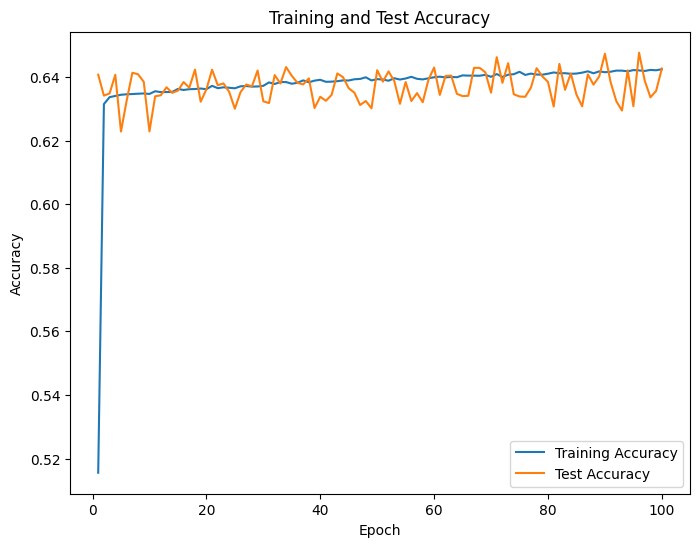

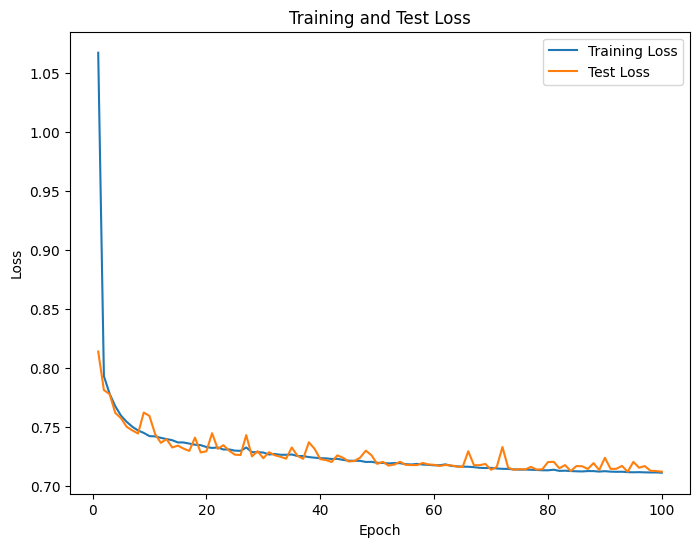

In [18]:
# Ambil histori akurasi dan loss dari proses pelatihan
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Buat plot untuk akurasi
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(test_accuracy) + 1), test_accuracy, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

# Buat plot untuk loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(test_loss) + 1), test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

In [19]:
# Evaluasi performa pada data latih
training_scores = model.evaluate(X_train, y_train)
print("Performa pada Data Latih:")
print("Loss:", training_scores[0])
print("Akurasi:", training_scores[1])

14976/14976 [==============================] - 15s 999us/step - loss: 0.7083 - accuracy: 0.6453
Performa pada Data Latih:
Loss: 0.7083316445350647
Akurasi: 0.6452907919883728


In [20]:
# Evaluasi performa pada data uji
loss, accuracy = model.evaluate(X_val, y_val)
print("Loss pada Data Uji:", loss)
print("Akurasi pada Data Uji:", accuracy)

3744/3744 [==============================] - 4s 971us/step - loss: 0.7118 - accuracy: 0.6427
Loss pada Data Uji: 0.7117630839347839
Akurasi pada Data Uji: 0.6426699161529541


In [21]:
# Menghitung prediksi pada data uji
y_val_pred = model.predict(X_val)

3744/3744 [==============================] - 3s 825us/step


In [22]:
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error

# metrik evaluasi untuk masalah regresi
print("Mean Squared Error:")
print(mean_squared_error(y_val, y_val_pred))

print("Mean Absolute Error:")
print(mean_absolute_error(y_val, y_val_pred))


Mean Squared Error:
0.10719812
Mean Absolute Error:
0.21427667


In [23]:
model.save('All.h5')

c:\Program Files\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Load Model

In [2]:
model = load_model('All.h5')

# test anyar

In [3]:
load = "c:/TA/csv-400-400/"
files_csv =[]
for root, dirs, files in os.walk(load):
    for file_name in files:
        if file_name.endswith(".csv"):
            file_load = os.path.join(root, file_name)
            files_csv.append(file_load)

In [4]:
i = 0

for file_csv in files_csv:
   
    df = pd.read_csv(file_csv)
    # start_index = 1
    # end_index = 1551
    # df = df_uncut[start_index:end_index]
    var = df['X'].values
    data = df['Y'].values
     
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    
    #Filter bandpass
    filtered_signal = signal.filtfilt(b, a, data)
    
    # Rectify signal
    rectified_signal = np.abs(filtered_signal)
    
    # One-sided FFT
    signal_fft = np.fft.fft(filtered_signal)
    signal_freq = np.fft.fftfreq(len(filtered_signal), 1/fs)
    n = len(filtered_signal)
    freq = signal_freq[0:int(n/2)]
    fft_amp = np.abs(signal_fft)[0:int(n/2)]/n*2
    
    # One-sided PSD
    psd = (1/(fs*n)) * np.square(np.abs(signal_fft[:n//2]))
    freq_psd = signal_freq[0:int(n/2)]
    psd_one_side = psd[0:int(n/2)]
    
    processed_csv_file = file_csv.replace(".csv", "_processed.csv")
    df.to_csv(processed_csv_file, index=False)
    
    # fig, axs = plt.subplots(2, 2, figsize=(10,10))

    # axs[0, 0].plot(var, filtered_signal)
    # axs[0, 0].set_title(file_csv)
    # axs[0, 0].set_xlabel('Time (us)')
    # axs[0, 0].set_ylabel('Amplitude (V)')

    # axs[0, 1].plot(var, rectified_signal)
    # axs[0, 1].set_title(file_csv)
    # axs[0, 1].set_xlabel('Time (us)')
    # axs[0, 1].set_ylabel('Amplitude (V)')

    # axs[1, 0].plot(freq, fft_amp)
    # axs[1, 0].set_title(file_csv)
    # axs[1, 0].set_xlabel('Frequency (MHz)')
    # axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

    # axs[1, 1].plot(freq_psd, psd_one_side)
    # axs[1, 1].set_title(file_csv)
    # axs[1, 1].set_xlabel('Frequency (MHz)')
    # axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

    # save_img = file_csv+".png"
    # plt.savefig(save_img)


NameError: name 'fs' is not defined

In [26]:

os.chdir(load)
if not os.path.exists(load+"Process"):
        os.makedirs(load+"Process")
        print("'data' folder created")
        
for root, dirs, files in os.walk(load):
        for filename in files:
            if filename.endswith("_processed.csv"):
                original_file = os.path.join(root, filename)                
                if not "Process/" in original_file:
                    print("Moved '",original_file," to ","./Process/"+filename)
                    os.rename(original_file, "./Process/"+filename)

Moved ' c:/TA/csv-400-400/csv 30%\A30A1_processed.csv  to  ./Process/A30A1_processed.csv
Moved ' c:/TA/csv-400-400/csv 30%\A30A2_processed.csv  to  ./Process/A30A2_processed.csv
Moved ' c:/TA/csv-400-400/csv 30%\A30A3_processed.csv  to  ./Process/A30A3_processed.csv
Moved ' c:/TA/csv-400-400/csv 30%\A30A4_processed.csv  to  ./Process/A30A4_processed.csv
Moved ' c:/TA/csv-400-400/csv 30%\A30A5_processed.csv  to  ./Process/A30A5_processed.csv
Moved ' c:/TA/csv-400-400/csv 30%\A30B1_processed.csv  to  ./Process/A30B1_processed.csv
Moved ' c:/TA/csv-400-400/csv 30%\A30B2_processed.csv  to  ./Process/A30B2_processed.csv
Moved ' c:/TA/csv-400-400/csv 30%\A30B3_processed.csv  to  ./Process/A30B3_processed.csv
Moved ' c:/TA/csv-400-400/csv 30%\A30B4_processed.csv  to  ./Process/A30B4_processed.csv
Moved ' c:/TA/csv-400-400/csv 30%\A30B5_processed.csv  to  ./Process/A30B5_processed.csv
Moved ' c:/TA/csv-400-400/csv 30%\A30C1_processed.csv  to  ./Process/A30C1_processed.csv
Moved ' c:/TA/csv-400

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'c:/TA/csv-400-400/process\\30%\\A30A1_processed.csv' -> './Process/A30A1_processed.csv'

# Predict Datatest

In [87]:
model = load_model('bone-predictor.h5')

In [89]:
# Membaca dataset yang ingin diprediksi
predict_df = pd.read_csv('c:/TA/Pengujian Model/Data csv/1.csv')
X_predict = predict_df.iloc[:].values

In [90]:
# Memprediksi label menggunakan model yang telah dilatih
y_pred_encoded = model.predict(X_predict)
y_pred = np.argmax(y_pred_encoded, axis=1)
y_pred_label = label_encoder.inverse_transform(y_pred)

390/390 [==============================] - 1s 1ms/step


In [91]:
predict_df = pd.read_csv('c:/TA/Pengujian Model/Data csv/1.csv')
# predict_df = pd.read_csv('C:/TA/LTSM/70%/A705.csv')

# Save Predict

In [92]:
result_df = predict_df.copy()
result_df['predicted_label'] = y_pred_label
result_df.to_csv('data_predict_predicted.csv', index=False)

# Result Predict

In [93]:
print(result_df['predicted_label'].value_counts())

predicted_label
Density 70%    9253
Density 90%    2045
Density 30%     931
Density 50%     251
Name: count, dtype: int64


In [94]:
label_counts = result_df['predicted_label'].value_counts()
highest_label = label_counts.idxmax()
highest_count = label_counts.max()

if (highest_count > (0.64*X_predict.shape[0])):
    print("Data match :", highest_label)

else:
    print("Not Match")

Data match : Density 70%


# Bone Densitometry

## Predict Datatest

In [95]:
# Load model yang sudah ditraining
model = load_model('bone-predictor.h5')

In [96]:
# Membaca dataset yang ingin diprediksi
predict_df = pd.read_csv('C:/TA/Pengujian Model/Data csv/1.csv')
X_predict = predict_df.iloc[:].values

In [97]:
# Memprediksi label menggunakan model yang telah dilatih
y_pred_encoded = model.predict(X_predict)
y_pred = np.argmax(y_pred_encoded, axis=1)
y_pred_label = label_encoder.inverse_transform(y_pred)

390/390 [==============================] - 1s 838us/step


In [98]:
predict_df = pd.read_csv('C:/TA/Pengujian Model/Data csv/1.csv')
# predict_df = pd.read_csv('C:/TA/LTSM/70%/A705.csv')

## Save Predict

In [99]:
result_df = predict_df.copy()
result_df['predicted_label'] = y_pred_label
result_df.to_csv('data_predict_predicted.csv', index=False)

## Result Predict

print(result_df['predicted_label'].value_counts())

In [100]:
label_counts = result_df['predicted_label'].value_counts()
highest_label = label_counts.idxmax()
highest_count = label_counts.max()

if (highest_count > (0.64*X_predict.shape[0])):
    print("Data match :", highest_label)

else:
    print("Not Match")

Data match : Density 70%
